In [1]:
###购物篮词云分析###
###数据集：MarketBasket###
###对数据集进行词云可视化展示，可视化探索（Top10的商品有哪些）###

###导入相关包###
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize
import os
import pandas as pd

In [2]:
###导入购物篮数据 保存为 id item dataframe 同一个id下多个item 分为多行进行存取#  
##数据读入与预处理##
os.chdir('D:/开课吧数据挖掘资料/第二讲—数据挖掘与关联规则/code/MarketBasket')
data = pd.read_csv('./Market_Basket_Optimisation.csv',header=None)
print(data.head())
print(data.shape)

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

In [3]:
#存为id item dataframe 同一个id下多个item 分为多行进行存取#    
temp=[]
temp = pd.DataFrame(columns = ['id','item'])    
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        if str(data.values[i,j])!='nan':
#            print(i,str(data.values[i,j]))
            temp1={}
            temp1['id']=i
            temp1['item']=str(data.values[i,j])
            temp=temp.append(temp1,ignore_index=True)

print(temp.head())
print(temp.shape) 

  id            item
0  0          shrimp
1  0         almonds
2  0         avocado
3  0  vegetables mix
4  0    green grapes
(29363, 2)


In [4]:
#####Note：都为有效item 名词 故不适用停用词#####
# 生成词云函数#
def create_word_cloud(f):
	print('根据词频，开始生成词云!')
	cut_text = word_tokenize(f)
	#print(cut_text)
	cut_text = " ".join(cut_text)

	wc = WordCloud(
		max_words=100,
		width=2000,
		height=1200,)
	wordcloud = wc.generate(cut_text)
	# 写词云图片
	wordcloud.to_file("wordcloud.jpg")
	# 显示词云文件
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.show()

根据词频，开始生成词云!


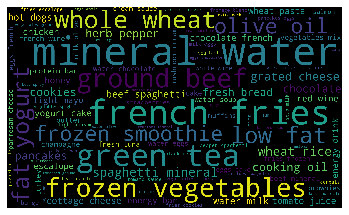

In [5]:
#所有item 单词 生成一个字符串#
item_str=' '.join((temp['item']))
#调用词云生成函数#
create_word_cloud(item_str)

In [7]:
#top 10商品排序输出#
item_cnt=temp.groupby(['item'])['item'].count().sort_values(ascending = False)
#qc#
print(item_cnt.sum())
#top 10 item 输出#
print(item_cnt[0:10])

29363
item
mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
Name: item, dtype: int64
